# Machine Learning and Statistics
## Lecturer: Ian Mcloughlin
## Project-2020

The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set.In this Jupyter notebook we explore the given data set and  trains a model using the data set. In the notebook also explain the model and give an analysis of its accuracy.

In [1]:
# import seaborn 
import seaborn as sns
# Seaborn is a library for making statistical graphics in Python
#It is built on top of matplotlib and closely integrated with pandas data structures.

%matplotlib inline 
# https://stackoverflow.com/a/43028105 to fix the graph 
# import matplotlib
import matplotlib.pyplot as plt
#Matplotlib is a Python 2D plotting library 
#which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

# import pandas
import pandas as pd

# sklearn packages we need for regression import later in regression part to keep that altogather
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression

### Load Dataset

In [2]:
df = pd.read_csv("./powerproduction.csv")


### Exploratory Data Analysis(EDA)
EDA is an analysis approach that focuses on identifying general patterns in the data and to find previously unknown relationships.

In [3]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
df.shape

(500, 2)

In [5]:
df.columns

Index(['speed', 'power'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Statistical summary

In [7]:
print(df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


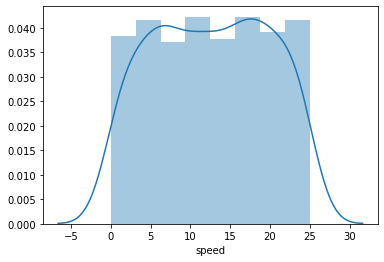

In [8]:
sns.distplot(df['speed'])

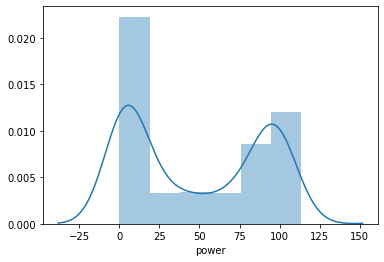

In [9]:
sns.distplot(df['power'])

### scatter plot

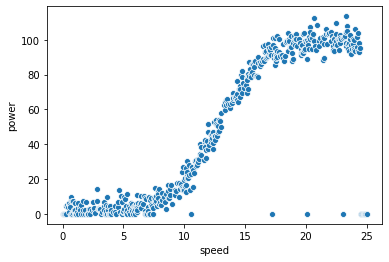

In [10]:
sns.scatterplot(x='speed',y='power',data = df)

There are few outliears

The shape of the graph is like S

Linear Regression

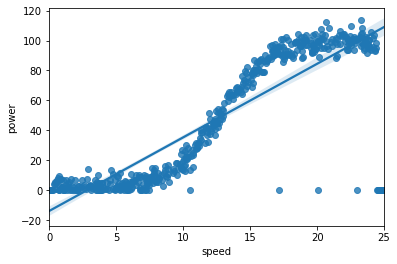

In [11]:
sns.regplot(x='speed',y='power',data = df)
plt.show()

### Outliers
as you can see from the above graph that the are some outliers that are at power 0 to check the number of outliers<br>
Wikipedia definition,<br>
In statistics, an outlier is an observation point that is distant from other observations.

In [12]:
print (df[df.power == 0])
df2= df[df.power == 0]
df2.count()

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    49
power    49
dtype: int64

there are 49 rows where power is 0

In [13]:
df.isin([0]).sum()

speed     1
power    49
dtype: int64

In [18]:
index = df[(df['power'] == 0)].index
df.drop(index, inplace=True)
#drop the rows where power is 0 to remove outliers

In [19]:
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


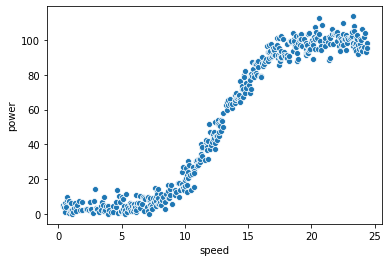

In [21]:
#graph after removing outliers
sns.scatterplot(x='speed',y='power',data = df)

positive S shaped function. As we look at the regplot it is obvious that the linear regression does not fit the data.

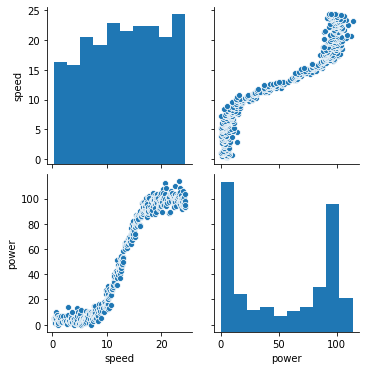

In [20]:
sns.pairplot(df)
plt.show()

In [28]:
#polynomial regression
X=df[['speed']]
y=df['power']

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

### Predicting the Results
In this step, we are going to predict the values Salary based on the Polynomial Regression model built. The “regressor.predict” function is used to predict the values for our independent variable, X_poly. We assign the predicted values as y_pred. We now have two data, y(real values) and y_pred (predicted values).

In [53]:
X_polytest = poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_polytest)
print(y_pred)

[ 4.76446910e+01  9.55948322e+01  1.01147186e+02  6.85316898e+01
  4.99790292e+01  9.38580609e+01  9.51023561e+01  8.73920201e+01
  9.07402971e+01  9.29121598e+01  2.51041668e+01  7.26650986e+01
  2.88988817e+01  8.82556936e+01  1.02602831e+02  6.51839501e-01
 -9.00712712e-01 -7.38606448e-01  2.32599678e+01  9.95858808e+01
  1.50334106e+01  9.49299801e+01  5.88011187e+01  9.66353570e+01
  1.30240667e+01  2.67740976e+01  1.01310345e+02 -1.12538162e+00
  3.61668263e+01  9.10653702e+01  1.02851846e+02  5.23053014e+01
  1.01469127e+02  2.55190323e+01  8.84263550e+01  1.37412252e+01
  1.01063975e+02  1.05760687e+01  8.93817145e+00  9.65739778e+01
  1.34489870e+01  7.56241865e+01  1.40393653e+00  3.66169104e+01
  8.50685258e+01  7.85058111e+01  6.86754551e+00  7.05050709e+01
  5.38299603e+00  1.01699027e+02  4.18633542e+01  1.04032514e+02
  8.79122857e+01  9.83218339e+01  9.43622785e+01  7.45766286e+01
  1.27920308e+01 -1.72520888e+00  7.14873075e+00 -8.05937939e-01
 -2.14409055e+00  5.67145

In [54]:
#compare real value with predicted
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
244,40.519,47.644691
364,99.090,95.594832
390,92.203,101.147186
287,79.586,68.531690
252,51.471,49.979029
...,...,...
157,13.142,10.148044
433,103.268,103.738301
112,4.380,0.409155
125,5.842,2.417200


### Visualising the Polynomial Regression results
In this last step, we shall visualize the polynomial model that was built using the given data and plot the values of “y” and “y_pred” on the graph and analyze the results

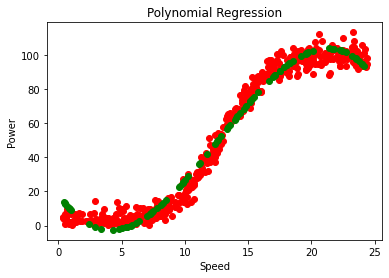

In [55]:
import numpy as np
plt.scatter(X, y, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

In [60]:
poly_reg = PolynomialFeatures(degree = 5)# change degree
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
X_polytest = poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_polytest)

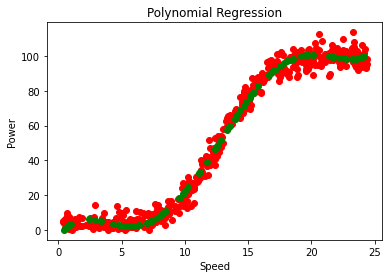

In [62]:
plt.scatter(X, y, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

# References

 1. What is the Sigmoid Function? https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function#:~:text=One%20of%20the%20most%20widely,range%20(0%2C%201).&text=A%20sigmoid%20function%20placed%20as,to%20work%20with%20and%20interpret.
 2. Ways to Detect and Remove the Outliers https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba accessed 19/11/2020
 3. Understanding Non-Linear Regression available online from https://medium.com/towards-artificial-intelligence/understanding-non-linear-regression-fbef9a396b71 accessed on 22/12/2020
 4. Machine Learning Basics: Polynomial Regression https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1 accessed on 23/12/2020
5. https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226